In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import nltk
from nltk.corpus import words


In [10]:
nltk.download('punkt')
nltk.download('words')


[nltk_data] Downloading package punkt to /home/ambar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/ambar/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Data text preprocessing

In [13]:
# Cargar el archivo CSV
archivo_csv = 'train.csv'
# archivo_csv = 'train_small.csv'
datos = pd.read_csv(archivo_csv)
datos['label'] = datos['label'].replace({'pos': 1, 'neg': -1})


/tmp/ipykernel_10811/3580876138.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['label'] = datos['label'].replace({'pos': 1, 'neg': -1})


#### Filtro que vamos a aplicar a los datos de texto:

In [12]:
# Función para leer las palabras a ignorar desde un archivo de texto
def load_ignore_words(filepath):
    with open(filepath, 'r') as file:
        ignore_words = file.read().splitlines()
    return ignore_words

# # Cargar las palabras a ignorar desde el archivo
# ignore_words = load_ignore_words('ignore_words.txt')
english_words = set(words.words())


In [11]:
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        stemmer = PorterStemmer()
        # return lambda doc: (stemmer.stem(w) for w in analyzer(doc) if not re.fullmatch(r'\d+', w))
        return lambda doc: (stemmer.stem(w) for w in analyzer(doc) 
                            if not re.fullmatch(r'\d+', w) 
                            # and w not in ignore_words 
                            # and not re.search(r'[^a-zA-Z]', w)
                            and w in english_words)

#### Generacion de un nuevo dataset con las siguientes columnas de nuestra matrix caracteristica:

In [14]:
vectorizer = StemmedTfidfVectorizer(stop_words='english',sublinear_tf=True)
tfidf_matrix = vectorizer.fit_transform(datos["message"].values)
tfidf_matrix = tfidf_matrix.astype('float32')

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Insertar la columna de etiquetas como la primera columna
tfidf_df.insert(0, 'label___', datos['label'].values)

In [7]:
for i in tfidf_df.columns.values:
    print(i)
# print(tfidf_df.columns.values)

label___
aa
aba
aback
abandon
abash
abat
abba
abbasi
abbey
abbot
abdomen
abdomin
abduct
abductor
aberr
abey
abhor
abhorr
abi
abid
abigail
abil
abject
abjectli
abl
ablaz
abli
abnorm
aboard
abod
abolish
abolit
abolition
abomin
aborigin
abort
abortionist
abound
about
abras
abreast
abridg
abroad
abrupt
abruptli
abscess
abscond
absenc
absent
absente
absentmindedli
absolut
absolv
absorb
absorpt
abstain
abstin
abstract
absurd
absurdli
abu
abund
abundantli
abus
abut
abuzz
abysm
abyss
academ
academi
acapulco
acced
acceler
accent
accentu
accept
access
accessori
accid
accident
acclaim
acclam
acclim
accolad
accommod
accompani
accomplic
accomplish
accord
accordingli
accordion
accost
account
accredit
accumul
accur
accuraci
accurs
accus
accusatori
accustom
ace
acerb
acetylen
ach
achiev
achingli
acid
acker
acknowledg
acm
acn
acolyt
acorn
acoust
acquaint
acquiesc
acquir
acquisit
acquit
acquitt
acr
acrid
acrimoni
acrobat
acronym
acropoli
act
actin
action
actionless
activ
activist
actor
actress
actual
ac

#### Generacion de un nuevo dataset con las siguientes columnas de nuestra matrix caracteristica:

In [10]:
# # Print the shape of the matrix
# print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)

# tfidf_df.to_csv('tfidf_values_10values.csv', index=False)


## Data analysis

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt


In [12]:
# # importing or loading the dataset
# dataset = pd.read_csv('tfidf_values_10values.csv')

# # distributing the dataset into two components X and Y
# X = dataset.iloc[:, 1:].values
# Y = dataset.iloc[:, 0].values
# print(X.shape, Y.shape)

In [16]:
X = tfidf_df.iloc[:, 1:].values
Y = tfidf_df.iloc[:, 0].values
print(X.shape, Y.shape)

(25000, 19212) (25000,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)


(20000, 19212) (5000, 19212)


In [18]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
pca = PCA(n_components = 10521)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# kpca = KernelPCA(n_components=11000, kernel='rbf')  # Puedes cambiar el kernel según tus necesidades
# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)

In [21]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_train_df.to_csv('pca_train_data8020.csv', index=False)
X_test_df.to_csv('pca_test_data8020.csv', index=False)

In [23]:
X_train.shape, X_test.shape

((20000, 10521), (5000, 10521))

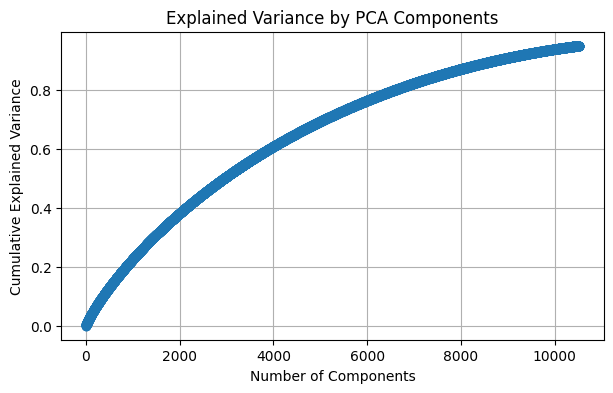

Number of components that explain at least 95% of the variance: 1


In [24]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Print the number of components that explain at least 95% of the variance
num_components_95 = (cumulative_explained_variance >= 0.95).argmax() + 1
print(f'Number of components that explain at least 95% of the variance: {num_components_95}')

### Regresion logistica

In [25]:
from sklearn.linear_model import LogisticRegression  

classifier = LogisticRegression(random_state = 42,  max_iter=5000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1}')

f1_per_class = f1_score(y_test, y_pred, average=None)
print(f'F1 Score per class: {f1_per_class}')

F1 Score (weighted): 0.8005973426823675
F1 Score per class: [0.79607282 0.80493054]


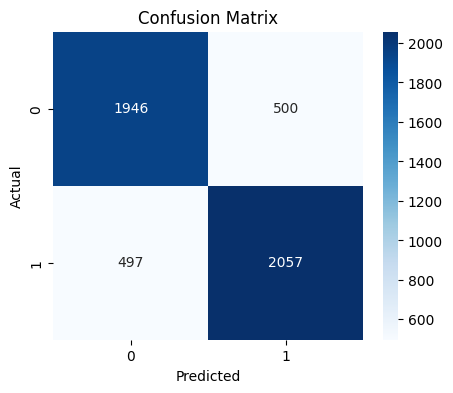

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [96]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        # Gradient Descent
        for _ in range(self.num_iterations):
            self.update_weights()

    def update_weights(self):
        linear_model = np.dot(self.X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)

        # Compute gradients
        dw = (1 / self.m) * np.dot(self.X.T, (y_pred - self.y))
        db = (1 / self.m) * np.sum(y_pred - self.y)

        # Update weights
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)

In [97]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)


In [98]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [99]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9751
Test Accuracy: 0.8512


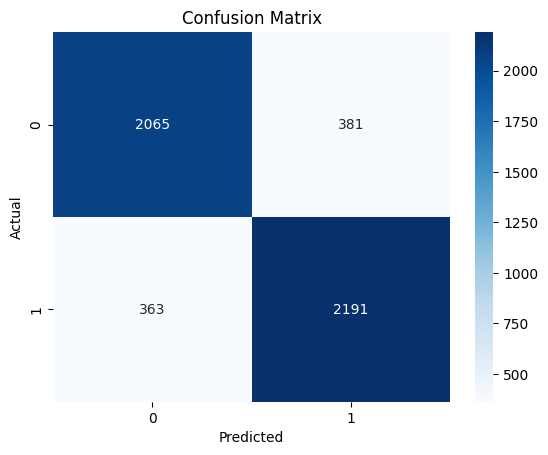

In [90]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

In [32]:
y_pred_rf = rf.predict(X_test)

In [33]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf, target_names=['neg', 'pos']))

Accuracy: 0.733
              precision    recall  f1-score   support

         neg       0.72      0.75      0.73      2446
         pos       0.75      0.71      0.73      2554

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo de Árbol de Decisión
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = tree.predict(X_test)

# Evaluar el modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy_tree}')
print(classification_report(y_test, y_pred_tree, target_names=['neg', 'pos']))


Accuracy: 0.6238
              precision    recall  f1-score   support

         neg       0.61      0.63      0.62      2446
         pos       0.64      0.62      0.63      2554

    accuracy                           0.62      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.62      0.62      0.62      5000



### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Modelo SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm, target_names=['neg', 'pos']))


Accuracy: 0.8006
              precision    recall  f1-score   support

         neg       0.80      0.79      0.80      2446
         pos       0.80      0.81      0.81      2554

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



### Red neuronal

In [29]:
import numpy as np

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

In [42]:
device = torch.device('cpu')
print(f'Using device: {device}')


Using device: cpu


In [43]:
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [44]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)


In [45]:
class PimaClassifier(nn.Module):
    def __init__(self, num_variables):
        super().__init__()
        self.hidden1 = nn.Linear(num_variables, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, num_variables)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(num_variables, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

In [46]:
n_variables = X_train.shape[1]
model = PimaClassifier(num_variables=n_variables)
print(model)

loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 16

PimaClassifier(
  (hidden1): Linear(in_features=10521, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=10521, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=10521, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [47]:
for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Finished epoch {epoch}, latest loss {loss.item()}')

Finished epoch 0, latest loss 0.286818265914917
Finished epoch 10, latest loss 0.0033859957475215197
Finished epoch 20, latest loss 0.0002437167422613129
Finished epoch 30, latest loss 6.250001430511475
Finished epoch 40, latest loss 0.0019277972169220448
Finished epoch 50, latest loss 0.00010561857925495133
Finished epoch 60, latest loss 4.150842666625977
Finished epoch 70, latest loss 1.1291729862250577e-07
Finished epoch 80, latest loss 4.809922415915935e-08
Finished epoch 90, latest loss 1.526969526821631e-06


In [48]:
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_test = model(X_test_tensor)
    
accuracy_train = (y_pred_train.round() == y_train_tensor).float().mean()
accuracy_test = (y_pred_test.round() == y_test_tensor).float().mean()
print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.9890000224113464
Test Accuracy: 0.8011999726295471


In [52]:
predictions = (model(X_test_tensor) > 0.5).int()

# Evaluar las predicciones
y_test_np = y_test_tensor.numpy().flatten()
predictions_np = predictions.numpy().flatten()

print(classification_report(y_test_np, predictions_np, target_names=['neg', 'pos']))

              precision    recall  f1-score   support

         neg       0.79      0.81      0.80      2446
         pos       0.81      0.79      0.80      2554

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



In [53]:
class ImprovedPimaClassifier(nn.Module):
    def __init__(self, num_variables):
        super().__init__()
        self.hidden1 = nn.Linear(num_variables, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        self.hidden2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        
        self.output = nn.Linear(32, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.bn1(self.hidden1(x)))
        x = self.dropout1(x)
        x = self.act2(self.bn2(self.hidden2(x)))
        x = self.dropout2(x)
        x = self.act_output(self.output(x))
        return x

In [54]:
n_variables = X_train.shape[1]
model = ImprovedPimaClassifier(num_variables=n_variables).to(device)
print(model)

loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 16

ImprovedPimaClassifier(
  (hidden1): Linear(in_features=10521, out_features=64, bias=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [55]:
for epoch in range(n_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Finished epoch {epoch}, latest loss {loss.item()}')


Finished epoch 0, latest loss 0.49816569685935974
Finished epoch 10, latest loss 0.1622929871082306
Finished epoch 20, latest loss 0.01538544986397028
Finished epoch 30, latest loss 0.151370570063591
Finished epoch 40, latest loss 0.024243775755167007
Finished epoch 50, latest loss 0.17023709416389465
Finished epoch 60, latest loss 0.0070679886266589165
Finished epoch 70, latest loss 0.0046952879056334496
Finished epoch 80, latest loss 0.000887668167706579
Finished epoch 90, latest loss 0.047456592321395874


In [95]:
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_test = model(X_test_tensor)
    
accuracy_train = (y_pred_train.round() == y_train_tensor).float().mean()
accuracy_test = (y_pred_test.round() == y_test_tensor).float().mean()
print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

AttributeError: 'LogisticRegression' object has no attribute 'eval'

In [94]:
predictions = (model(X_test_tensor) > 0.5).int()


TypeError: 'LogisticRegression' object is not callable

In [58]:
y_test_np = y_test_tensor.cpu().numpy().flatten()
predictions_np = predictions.cpu().numpy().flatten()

print(classification_report(y_test_np, predictions_np, target_names=['neg', 'pos']))


              precision    recall  f1-score   support

         neg       0.81      0.80      0.81      2446
         pos       0.81      0.82      0.82      2554

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



In [59]:
class model4(nn.Module):
    def __init__(self, num_variables):
        super().__init__()
        self.hidden1 = nn.Linear(num_variables, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        self.hidden2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        
        self.hidden3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.act3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        
        self.output = nn.Linear(32, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.bn1(self.hidden1(x)))
        x = self.dropout1(x)
        x = self.act2(self.bn2(self.hidden2(x)))
        x = self.dropout2(x)
        x = self.act3(self.bn3(self.hidden3(x)))
        x = self.dropout3(x)
        x = self.act_output(self.output(x))
        return x

In [60]:
n_variables = X_train.shape[1]
model = model4(num_variables=n_variables).to(device)
print(model)

loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

n_epochs = 100
batch_size = 16

model4(
  (hidden1): Linear(in_features=10521, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (hidden3): Linear(in_features=64, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): ReLU()
  (dropout3): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=32, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [61]:
for epoch in range(n_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    scheduler.step(loss)
    
    if epoch % 10 == 0:
        print(f'Finished epoch {epoch}, latest loss {loss.item()}')


Finished epoch 0, latest loss 0.40805143117904663
Finished epoch 10, latest loss 0.018578315153717995
Finished epoch 20, latest loss 0.013976811431348324
Finished epoch 30, latest loss 0.010528706945478916
Finished epoch 40, latest loss 0.007224337197840214
Finished epoch 50, latest loss 2.8815160476369783e-05
Finished epoch 60, latest loss 0.0007702586008235812
Finished epoch 70, latest loss 0.000695957278367132
Finished epoch 80, latest loss 0.0005784614477306604
Finished epoch 90, latest loss 4.2520216084085405e-05


In [62]:
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor)
    y_pred_test = model(X_test_tensor)
    
accuracy_train = (y_pred_train.round() == y_train_tensor).float().mean()
accuracy_test = (y_pred_test.round() == y_test_tensor).float().mean()
print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")


Train Accuracy: 0.9975000023841858
Test Accuracy: 0.7990000247955322


In [77]:
predictions = (model(X_test_tensor) > 0.5).int()

In [78]:
y_test_np = y_test_tensor.cpu().numpy().flatten()
predictions_np = predictions.cpu().numpy().flatten()

print(classification_report(y_test_np, predictions_np, target_names=['neg', 'pos']))

              precision    recall  f1-score   support

         neg       0.79      0.81      0.80      2446
         pos       0.82      0.80      0.81      2554

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



In [100]:
class model5(nn.Module):
    def __init__(self, num_variables):
        super().__init__()
        self.hidden1 = nn.Linear(num_variables, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        self.hidden2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        
        self.hidden3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.act3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        
        self.output = nn.Linear(64, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.bn1(self.hidden1(x)))
        x = self.dropout1(x)
        x = self.act2(self.bn2(self.hidden2(x)))
        x = self.dropout2(x)
        x = self.act3(self.bn3(self.hidden3(x)))
        x = self.dropout3(x)
        x = self.act_output(self.output(x))
        return x

In [101]:
n_variables = X_train.shape[1]
model5 = model5(num_variables=n_variables).to(device)
print(model5)

loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model5.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

n_epochs = 100
batch_size = 16

model5(
  (hidden1): Linear(in_features=10521, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (hidden3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act3): ReLU()
  (dropout3): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [102]:
for epoch in range(n_epochs):
    model5.train()
    for i in range(0, len(X_train_tensor), batch_size):
        Xbatch = X_train_tensor[i:i+batch_size]
        y_pred = model5(Xbatch)
        ybatch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    scheduler.step(loss)
    
    if epoch % 10 == 0:
        print(f'Finished epoch {epoch}, latest loss {loss.item()}')


Finished epoch 0, latest loss 0.3966744840145111
Finished epoch 10, latest loss 0.0076316590420901775
Finished epoch 20, latest loss 0.0021552592515945435
Finished epoch 30, latest loss 0.0004456627066247165


In [ ]:
model5.eval()
with torch.no_grad():
    y_pred_train = model5(X_train_tensor)
    y_pred_test = model5(X_test_tensor)

In [ ]:
accuracy_train = (y_pred_train.round() == y_train_tensor).float().mean()
accuracy_test = (y_pred_test.round() == y_test_tensor).float().mean()
print(f"Train Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.996749997138977
Test Accuracy: 0.8041999936103821


In [ ]:
predictions = (model5(X_test_tensor) > 0.5).int()

# Evaluar las predicciones
y_test_np = y_test_tensor.cpu().numpy().flatten()
predictions_np = predictions.cpu().numpy().flatten()

print(classification_report(y_test_np, predictions_np, target_names=['neg', 'pos']))

              precision    recall  f1-score   support

         neg       0.83      0.75      0.79      2446
         pos       0.78      0.85      0.82      2554

    accuracy                           0.80      5000
   macro avg       0.81      0.80      0.80      5000
weighted avg       0.81      0.80      0.80      5000



In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [PorterStemmer().stem(token) for token in tokens if token not in stopwords.words('english')]
    return ' '.join(tokens)


In [ ]:
english_words = set(words.words())
vectorizer = StemmedTfidfVectorizer(stop_words='english', sublinear_tf=True)

In [ ]:
test_data = pd.read_csv('test.csv')
test_data['message_clean'] = test_data['message'].apply(preprocess_text)
tfidf_test_matrix = vectorizer.transform(test_data['message_clean'].values)
tfidf_test_matrix = tfidf_test_matrix.astype('float32')


NameError: name 'stopwords' is not defined